In [176]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import numpy as np
import matplotlib.pyplot as plt

ibmqfactory.load_account:WARNING:2020-09-26 20:44:52,047: Credentials are already in use. The existing account in the session will be replaced.


In [177]:
SIM = qiskit.Aer.get_backend('qasm_simulator')
SHOTS = 1000

In [178]:
#https://en.wikipedia.org/wiki/Bell_state#Creating_Bell_states
#Ansatz expected to converge to Bell State Maker. 


In [179]:
class Ansatz_XX_measure:
    
    def __init__(self, backend, shots):
        
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit = qiskit.QuantumCircuit(2)
        self._circuit.rx(self.theta, 1)       
        self._circuit.h(0)
        self._circuit.cx(0,1)
        
        self._circuit.h([0, 1])
        self._circuit.measure_all()  
        
        self.backend = backend
        self.shots = shots
        
    def run(self, thetas):
        job = qiskit.execute(self._circuit, self.backend, shots = self.shots, 
                            parameter_binds = [{self.theta: theta} for theta in thetas])
        
        result = job.result().get_counts(self._circuit)
        
        
        states = np.array(list(result.keys())) 
        eigvaldict = {'00': 1, '01': -1, '10': -1, '11': 1}
        eigvals = [ eigvaldict.get(eigval) for eigval in states ]  #eigenvalues of eigenstates
        counts = np.array(list(result.values())) 
        probabilities = counts / self.shots  #probablilities corresponding to eigenvalues
        
        expectation = np.sum(eigvals * probabilities)  # <XX>
        
        return np.array([expectation])
      

In [180]:

class Ansatz_YY_measure:
    
    def __init__(self, backend, shots):
        
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit = qiskit.QuantumCircuit(2)
        self._circuit.rx(self.theta, 1)       
        self._circuit.h(0)
        self._circuit.cx(0,1)
        
        self._circuit.sdg([0, 1]) #
        self._circuit.h([0, 1])
        self._circuit.measure_all()  
        
        self.backend = backend
        self.shots = shots
        
    def run(self, thetas):
        job = qiskit.execute(self._circuit, self.backend, shots = self.shots, 
                            parameter_binds = [{self.theta: theta} for theta in thetas])
        result = job.result().get_counts(self._circuit)
        
        states = np.array(list(result.keys())) 
        eigvaldict = {'00': 1, '01': -1, '10': -1, '11': 1}
        eigvals = [ eigvaldict.get(eigval) for eigval in states ]  #eigenvalues of eigenstates
        counts = np.array(list(result.values())) 
        probabilities = counts / self.shots  #probablilities corresponding to eigenvalues
        
        expectation = np.sum(eigvals * probabilities)  # <YY>
        
        return np.array([expectation])
      

In [181]:
class Ansatz_ZZ_measure:
    
    def __init__(self, backend, shots):
        
        self.theta = qiskit.circuit.Parameter('theta')
        
        self._circuit = qiskit.QuantumCircuit(2)
        self._circuit.rx(self.theta, 1)       
        self._circuit.h(0)
        self._circuit.cx(0,1)
               
        self._circuit.measure_all()  
        
        self.backend = backend
        self.shots = shots
        
    def run(self, thetas):
        job = qiskit.execute(self._circuit, self.backend, shots = self.shots, 
                            parameter_binds = [{self.theta: theta} for theta in thetas])
        result = job.result().get_counts(self._circuit)
        
        states = np.array(list(result.keys())) 
        eigvaldict = {'00': 1, '01': -1, '10': -1, '11': 1}
        eigvals = [ eigvaldict.get(eigval) for eigval in states ]  #eigenvalues of eigenstates
        counts = np.array(list(result.values())) 
        probabilities = counts / self.shots  #probablilities corresponding to eigenvalues
        
        expectation = np.sum(eigvals * probabilities)   # <ZZ>
        
        return np.array([expectation])
      

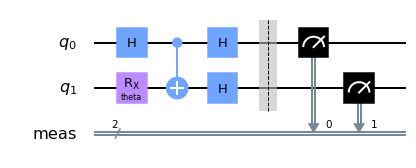

In [182]:
axm = Ansatz_XX_measure(SIM,SHOTS); axm._circuit.draw()


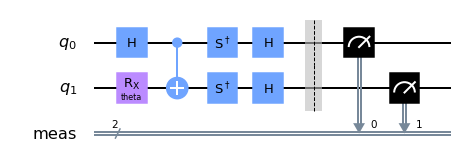

In [183]:
aym = Ansatz_YY_measure(SIM,SHOTS); aym._circuit.draw()

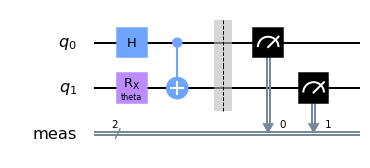

In [184]:
azm = Ansatz_ZZ_measure(SIM,SHOTS); azm._circuit.draw()

In [185]:
def calculateExpectation(simulator, shots, theta):
    E_XX = axm.run([theta])[0]
    E_YY = aym.run([theta])[0]
    E_ZZ = azm.run([theta])[0]
    
    E_H = 0.5 - 0.5*E_XX - 0.5*E_YY + 0.5*E_ZZ
    
    return E_H

In [190]:
x = np.linspace(0, 4*np.pi, 100)
y = []
for theta in x:
    y.append(calculateExpectation(SIM,SHOTS,theta))

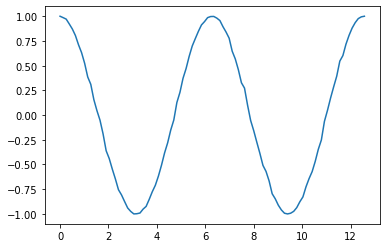

In [191]:
plt.plot(x,y)

In [ ]:
Lowest eigenvalue: -1